## chapter1 图论基础

### 创建一个简单的图

In [2]:
import networkx as nx

In [5]:
# 创建一个空图
G = nx.Graph()
# 添加节点
G.add_nodes_from([1, 2, 3, 4])
# 添加边
G.add_edges_from([(1,2), (1,3), (2,3), (2,4)])

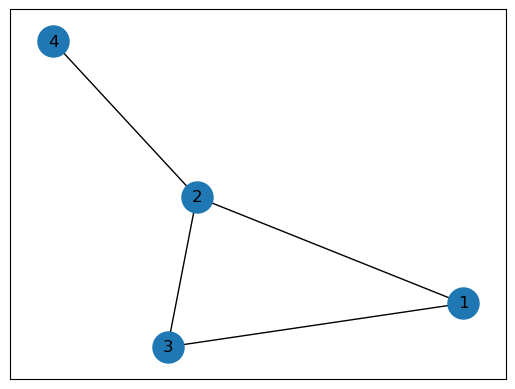

In [7]:
# 可视化
nx.draw_networkx(G, node_size=500, with_labels=True)

### 获取图的邻接矩阵

In [10]:
As = nx.adjacency_matrix(G)
print(As)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


C:\Users\10291\AppData\Local\Temp\ipykernel_20812\36223340.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


In [11]:
# 转化成二位数组形式的矩阵
A = As.todense()
print(A)

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


### 已知图的邻接矩阵，创建图

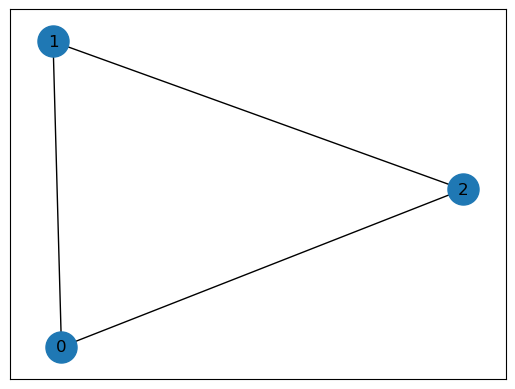

In [13]:
import numpy as np
A = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
G = nx.from_numpy_matrix(A)
nx.draw_networkx(G, node_size=500, with_labels=True)

### 加权图

In [14]:
G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])
As = nx.adjacency_matrix(G)
print(As.todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


C:\Users\10291\AppData\Local\Temp\ipykernel_20812\159311488.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


### 有向图

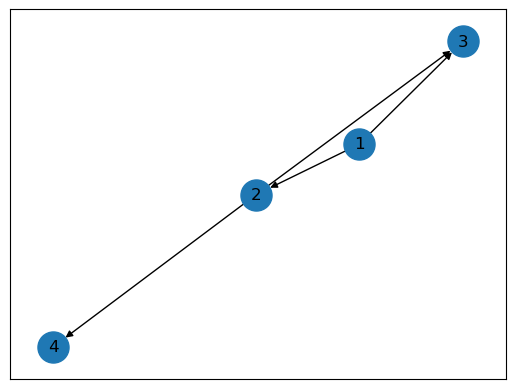

In [19]:
G = nx.DiGraph()
# 添加节点
G.add_nodes_from([1, 2, 3, 4])
# 添加边
G.add_edges_from([(1,2), (1,3), (2,3), (2,4)])
nx.draw_networkx(G, node_size=500, with_labels=True)

### 度、平均度以及度分布

In [21]:
G = nx.Graph()
# 添加节点
G.add_nodes_from([1, 2, 3, 4])
# 添加边
G.add_edges_from([(1,2), (1,3), (2,3), (2,4)])

In [24]:
# 获取网络G的度
d = nx.degree(G)

In [29]:
d = dict(nx.degree(G))
print(d)
print('average degree:', sum(d.values())/len(G.nodes))

{1: 2, 2: 3, 3: 2, 4: 1}
average degree: 2.0


In [30]:
# 获取度分布
nx.degree_histogram(G) # 返回所有位于区间[0, dmax]的度值的数列表

[0, 1, 2, 1]

### 绘制度分布直方图

In [31]:
import matplotlib.pyplot as plt

In [32]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

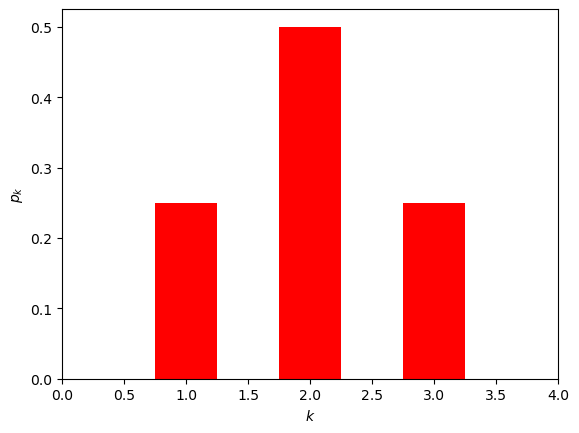

In [35]:
plt.bar(x, y, width=.5, color='red')
plt.xlabel('$k$')
plt.ylabel('$p_k$')
plt.xlim((0, 4))

### 路径和距离

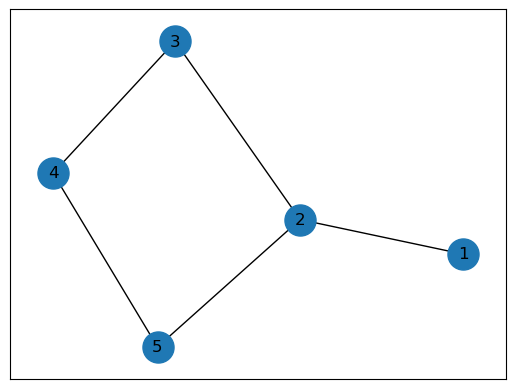

In [36]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1,2), (2,3), (2,5), (3,4), (4,5)])
nx.draw_networkx(G, node_size=500, with_labels=True)

In [44]:
nx.shortest_path(G, source=1, target=4)

{4: [4], 3: [4, 3], 5: [4, 5], 2: [4, 3, 2], 1: [4, 3, 2, 1]}

In [38]:
# 两个节点之间所有的最短路径
list(nx.all_shortest_paths(G, source=1, target=4))

[[1, 2, 3, 4], [1, 2, 5, 4]]

In [39]:
# 求两个节点的最短路径长度（距离）
nx.shortest_path_length(G, source=1, target=4)

3

In [42]:
# 求整个网络的平均距离
nx.average_shortest_path_length(G)

1.6

### 连通性

In [50]:
Ga = nx.Graph()
Ga.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
Ga.add_edges_from([(1,2), (1,3), (2,3), (4,7), (5,6), (5,7), (6,7)])
# nx.draw_networkx(Ga, node_size=500, with_labels=True)

In [51]:
Gb = nx.Graph()
Gb.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
Gb.add_edges_from([(1,2), (1,3), (2,3), (2,4), (4,7), (5,6), (5,7), (6,7)])
# nx.draw_networkx(Gb, node_size=500, with_labels=True)

In [52]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


### 集聚系数

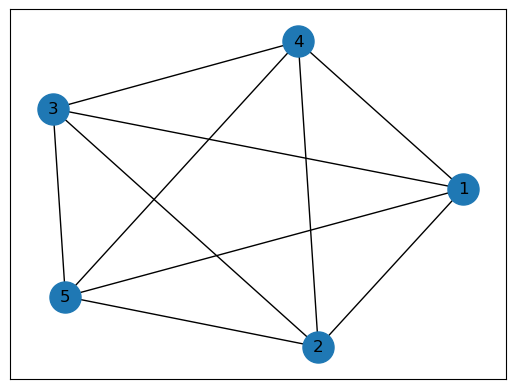

In [60]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (2,5), (3,4), (3,5), (4,5)])
nx.draw_networkx(G, node_size=500, with_labels=True)

In [54]:
print(nx.clustering(G, 1))

1.0


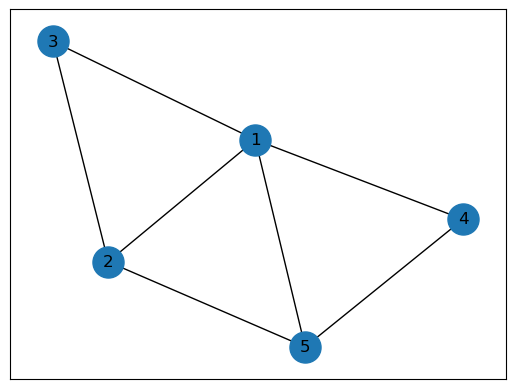

In [56]:
G.remove_edges_from([(2,4), (3,4), (3,5)])
nx.draw_networkx(G, node_size=500, with_labels=True)

In [57]:
print(nx.clustering(G, 1))

0.5


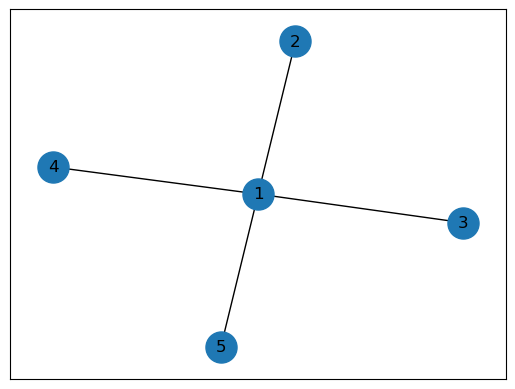

In [58]:
G.remove_edges_from([(2,3), (2,5), (4,5)])
nx.draw_networkx(G, node_size=500, with_labels=True)

In [59]:
print(nx.clustering(G, 1))

0


### 平均集聚系数与全局集聚系数的区别

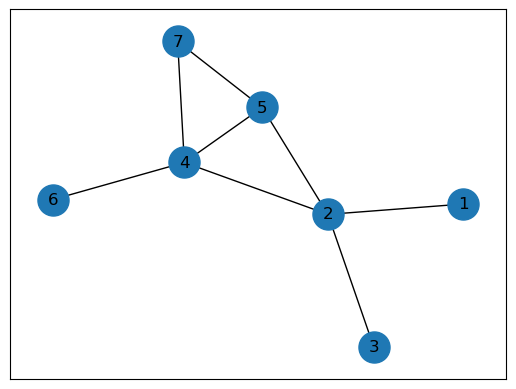

In [3]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1,2), (2,3), (2,4), (2,5), (4,5), (4,6), (4,7), (5,7)])
nx.draw_networkx(G, node_size=500, with_labels=True)

In [5]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [4]:
# 全局集聚系数
print(nx.transitivity(G))

0.375
